<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/testing_methods_for_visibility_threshold_2025_1302_1330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting visibility threshold method **test**

In [42]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

In [43]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

df_eflux

,MLT,ML,[mW m^-2]
0,0.00,50.0,0.009205
1,0.00,50.5,0.009303
2,0.00,51.0,0.005775
3,0.00,51.5,0.020590
4,0.00,52.0,0.000387
...,...,...,...
7675,23.75,87.5,0.023140
7676,23.75,88.0,0.022190
7677,23.75,88.5,0.023080
7678,23.75,89.0,0.016270


## Method 1 (orginal from: https://github.com/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/binary_classification_development/binary_classification_2024_0627_a0935.ipynb)**bold text**

In [44]:
array_eflux = df_eflux.to_numpy()
array_eflux

array_eflux_mag_coordinates = array_eflux[0:7680,0:2]
array_eflux_mag_coordinates
data = array_eflux_mag_coordinates
data

array_eflux_flux = array_eflux[0:7680,2:3]
#print(array_eflux_flux)


# Flatten to 1-D array
array_eflux_flux_flatten = array_eflux_flux.flatten(order = 'C')
print(array_eflux_flux_flatten)

# Using aurora visibility threshold = 1
labels = array_eflux_flux_flatten >= 1.0

# labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
print(labels)

[0.009205 0.009303 0.005775 ... 0.02308  0.01627  0.02794 ]
[False False False ... False False False]


Data for A:
[[ 0.   50.  ]
 [ 0.   50.5 ]
 [ 0.   51.  ]
 ...
 [23.75 88.5 ]
 [23.75 89.  ]
 [23.75 89.5 ]]
[False False False ... False False False]


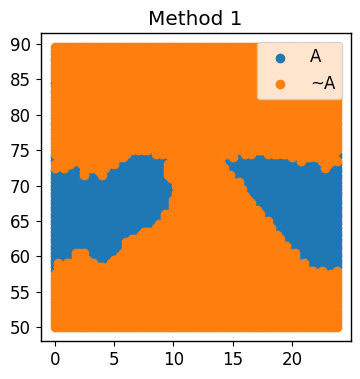

In [45]:
# Data for A from eflux file on GitHub
print("Data for A:")
print(data) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
# labels from eflux file (see above): labels = np.sum(np.square(data-[.5,.5]),axis=1)<.09
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels) # Added E.M

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Method 1")
plt.legend()
plt.show()

## Method **2**

In [46]:
#add column for visibility threshold T/F
df_eflux["VT"]= 0

#Set mW m^-2 to yes or no based on aurora visibility threshold
df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "VT"] = 1

df_eflux

,MLT,ML,[mW m^-2],VT
0,0.00,50.0,0.009205,0
1,0.00,50.5,0.009303,0
2,0.00,51.0,0.005775,0
3,0.00,51.5,0.020590,0
4,0.00,52.0,0.000387,0
...,...,...,...,...
7675,23.75,87.5,0.023140,0
7676,23.75,88.0,0.022190,0
7677,23.75,88.5,0.023080,0
7678,23.75,89.0,0.016270,0


Data for A:
        MLT    ML
0      0.00  50.0
1      0.00  50.5
2      0.00  51.0
3      0.00  51.5
4      0.00  52.0
...     ...   ...
7675  23.75  87.5
7676  23.75  88.0
7677  23.75  88.5
7678  23.75  89.0
7679  23.75  89.5

[7680 rows x 2 columns]
      VT
0      0
1      0
2      0
3      0
4      0
...   ..
7675   0
7676   0
7677   0
7678   0
7679   0

[7680 rows x 1 columns]


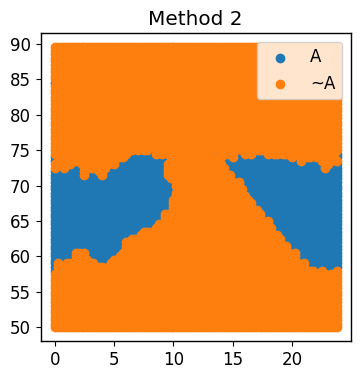

In [47]:
# Data for A from eflux file on GitHub
print("Data for A:")
#print(data) # Added E.M.
#print(labels) # Added E.M

print(df_eflux[["MLT","ML"]]) # Added E.M.
print(df_eflux[["VT"]]) # Added E.M

plt.figure(figsize=(4,4))

plt.scatter(df_eflux["MLT"][df_eflux['VT'].astype(bool)], df_eflux["ML"][df_eflux['VT'].astype(bool)], label='A')
plt.scatter(df_eflux["MLT"][np.logical_not(df_eflux['VT'].astype(bool))], df_eflux["ML"][np.logical_not(df_eflux['VT'].astype(bool))], label='~A')

plt.title("Method 2")
plt.legend()
plt.show()

## **This matches and seems to require less operations. On thing noticed while testing this is that ~A should be plotted first as it covers up some of the A datapoints as seen below**

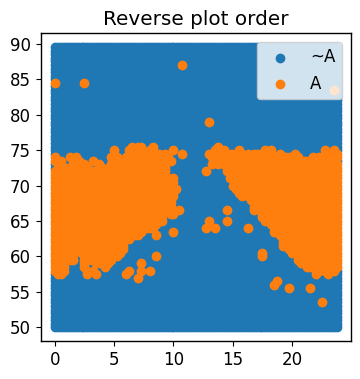

In [48]:
plt.figure(figsize=(4,4))

plt.scatter(df_eflux["MLT"][np.logical_not(df_eflux['VT'].astype(bool))], df_eflux["ML"][np.logical_not(df_eflux['VT'].astype(bool))], label='~A')
plt.scatter(df_eflux["MLT"][df_eflux['VT'].astype(bool)], df_eflux["ML"][df_eflux['VT'].astype(bool)], label='A')

plt.title("Reverse plot order")
plt.legend()
plt.show()

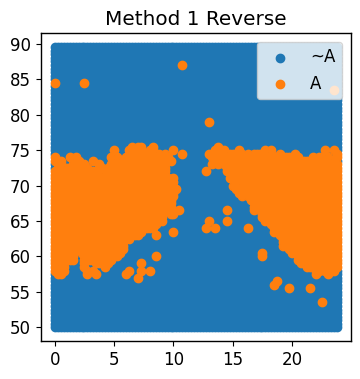

In [49]:
plt.figure(figsize=(4,4))
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Method 1 Reverse")
plt.legend()
plt.show()